In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

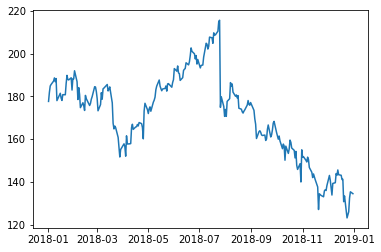

In [3]:
# Creating a line plot of the daily opening price
plt.plot(fb.index, fb.open)
plt.show()

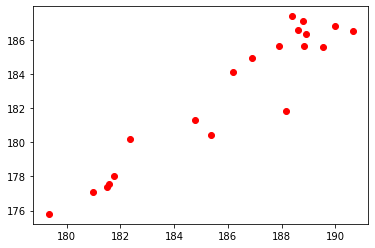

In [4]:
# Generating a scatter plot of high price versus low price
plt.plot('high', 'low', 'ro', data=fb.head(20))

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

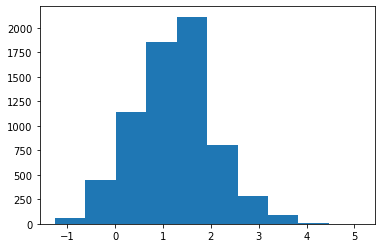

In [5]:
# Creating histogram of earthquake magnitudes
earthquakes = pd.read_csv('earthquakes.csv')
plt.hist(earthquakes.query('magType == "ml"').mag)

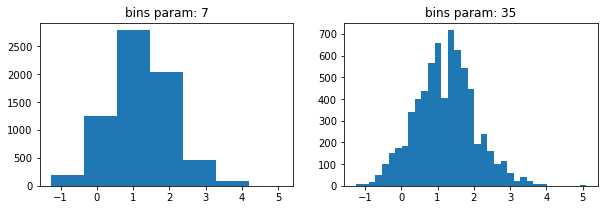

In [6]:
# Making two histograms using different number of bins
x = earthquakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
  ax.hist(x, bins=bins)
  ax.set_title(f'bins param: {bins}')

### Plot components

In [7]:
# Figure is the top-level object for matplotlib visualizations. 
# It contains Axes objects, which contain additional plot objects such as lines and ticks
# In case of subplots, the Figure object contains Axes objects with additional functionality

In [8]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

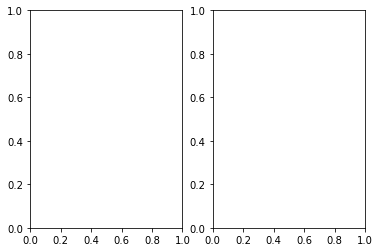

In [9]:
# plt.subplots() creates a Figure object with axes objects for subplots in the arrangement specifies. This returns a tuple of the form (Figure, Axes) which we unpack.
fig, axes = plt.subplots(1, 2)

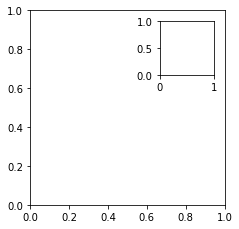

In [10]:
# Alternative to using plt.subplots() is to use add_axes() method on the Fugre object.
# It takes a list in the form of [left, bottom, width, height] as proportions of the figure dimensions
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

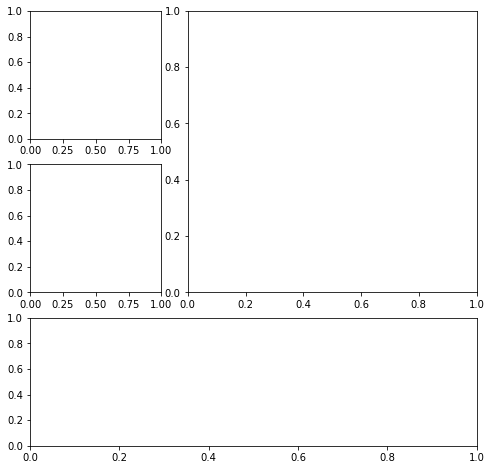

In [11]:
# Plotting graphs separate but not equally sized with add_gridspec() on the figure to create the grid for the subplots and then run add_subplot() on the figure 
# by passing in the area from the grid that the given subplot should occupy

fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2, :])

### Additional options

<Figure size 720x288 with 0 Axes>

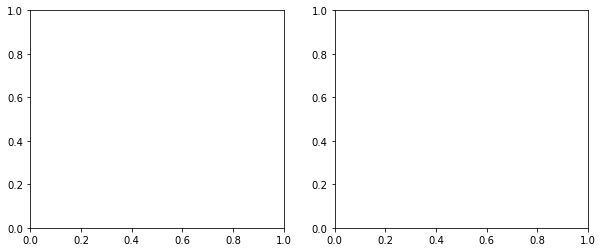

In [12]:
# figsize()
fig = plt.figure(figsize=(10, 4))
fig,axes = plt.subplots(1, 2, figsize=(10, 4))

In [13]:
# Matplotlib has rcParams dictionary with a lot of additional options for customizing default values
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20)
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.avconv_args',
 'axes.axisbelow',
 'axes.formatter.limits',
 'boxplot.capprops.color',
 'boxplot.meanprops.marker',
 'boxplot.whiskerprops.color',
 'figure.dpi',
 'image.interpolation',
 'lines.dash_joinstyle',
 'lines.markersize',
 'lines.solid_capstyle',
 'markers.fillstyle',
 'mpl_toolkits.legacy_colorbar',
 'savefig.transparent',
 'scatter.edgecolors',
 'text.latex.preview',
 'xtick.color',
 'xtick.labelbottom',
 'xtick.top',
 'ytick.major.right']

In [14]:
# Current default value for figsize
mpl.rcParams['figure.figsize']

[6.0, 4.0]

In [15]:
# Changing the default value for figsize
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

In [16]:
# Restoring default settings
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [17]:
# Alternative change of default values with rc() method
plt.rc('figure', figsize=(20, 20))
plt.rcdefaults()

## Plotting with pandas

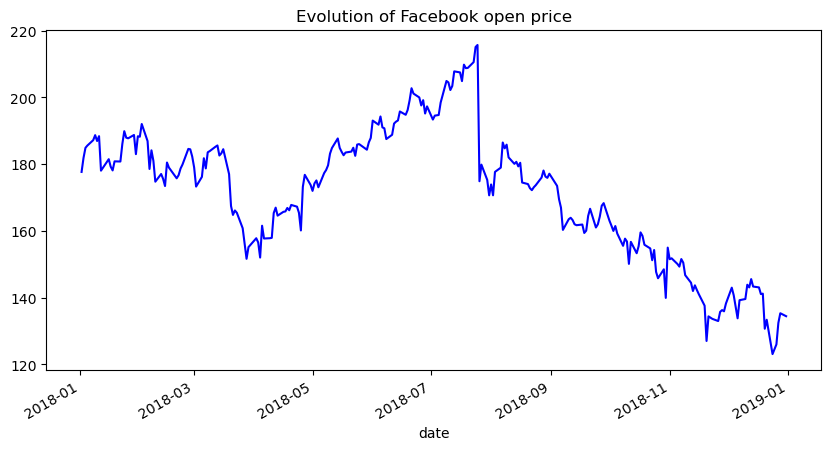

In [18]:
# Making plot graph using kind='line' to plot() method
# x value is not necessary, pandas will use the index
fb.plot(kind='line', y='open', figsize=(10, 5), style='b-', legend=False, title='Evolution of Facebook open price')

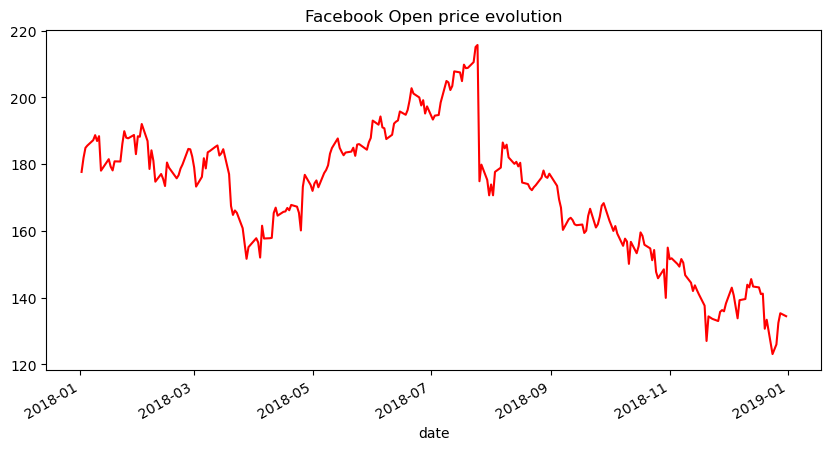

In [19]:
# Passing each component separately
fb.plot(kind='line', y='open', figsize=(10, 5), color='red', linestyle='solid', legend=False, title='Facebook Open price evolution')

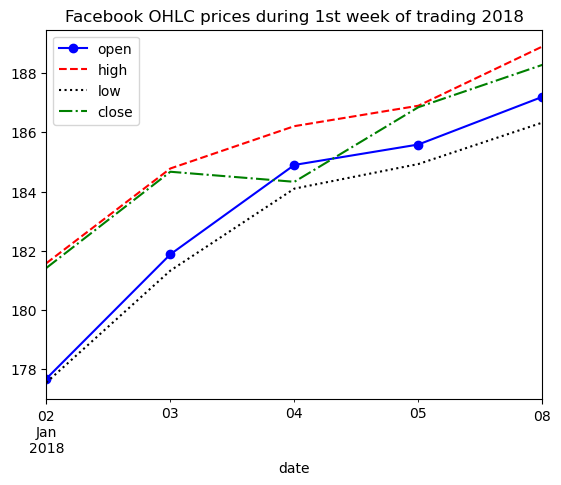

In [20]:
# Passing list of columns to plot and styling them individually
fb.iloc[:5].plot(y=['open', 'high', 'low', 'close'], style=['b-o', 'r--', 'k:', 'g-.'], title='Facebook OHLC prices during 1st week of trading 2018')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260767759A0>,
      dtype=object)

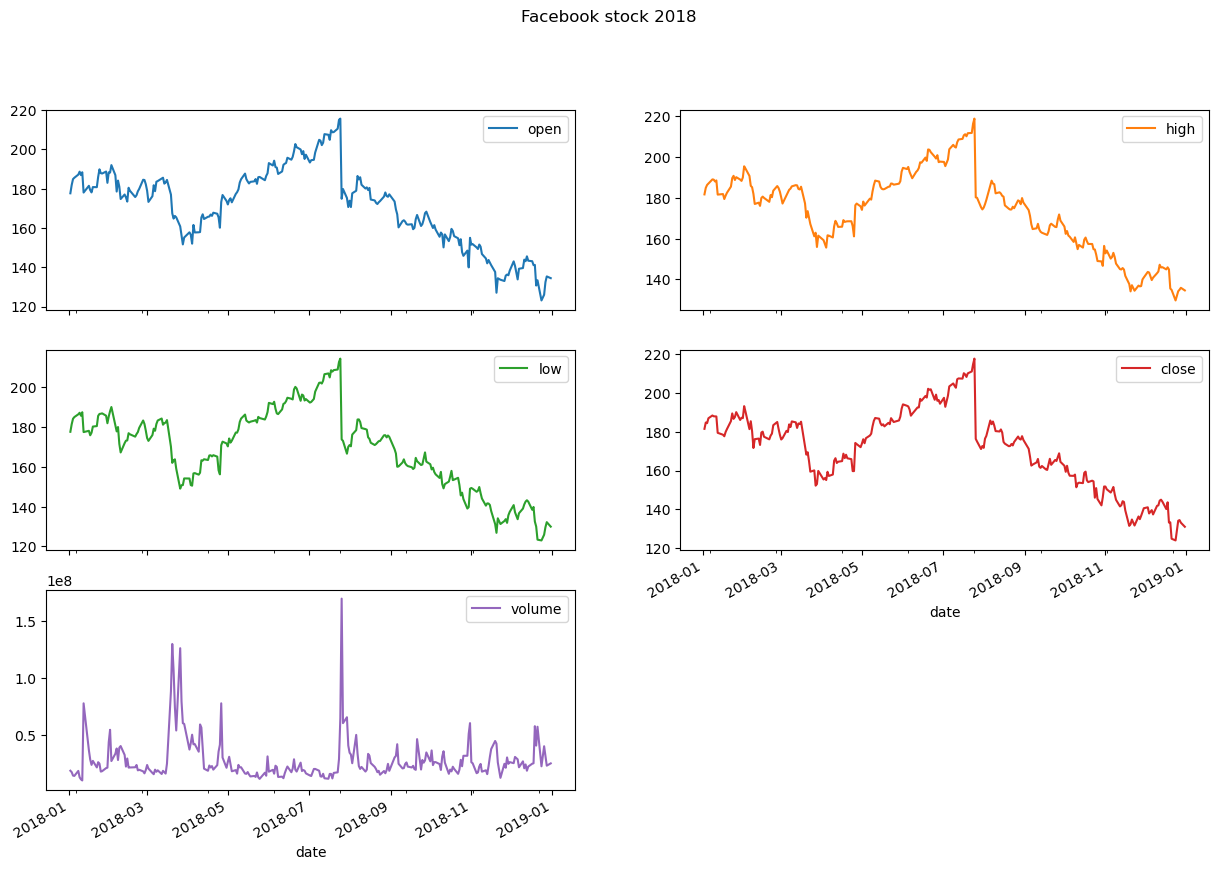

In [21]:
# Visualizing all the columns in the Facebook data as line plots
fb.plot(kind='line', subplots=True, layout=(3, 2), figsize=(15, 10), title='Facebook stock 2018')

# subplots automatically share x-axis, since they share a DatetimeIndex

# When working with subplots we have two options:
# - passing a single string for the title of the figure as a whole
# - passing a list of stirngs to use as the title for each subplot

### Relationships between variables

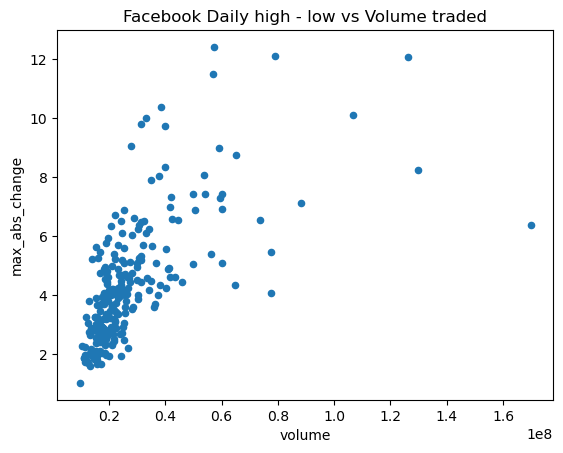

In [22]:
# Visualizing correlation of large volume traded with large drops in stock price of Facebook data
fb.assign(max_abs_change = fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily high - low vs Volume traded')

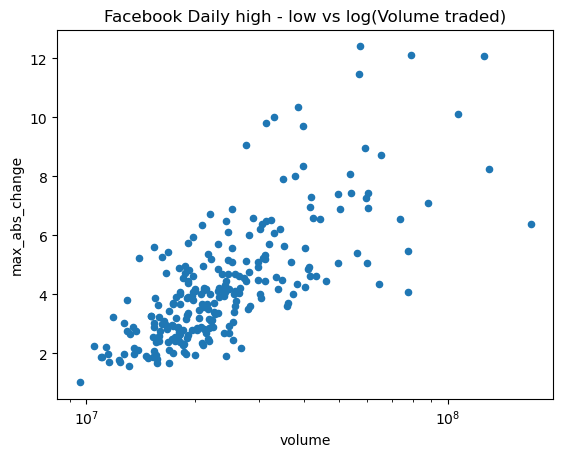

In [23]:
# Taking the log of the volume cane be done with few options:
# - create a new column that is the log of the volume using np.log()
# - use a log scale for the x-axis by passing in logx=True to the plot() method
# - call plt.xscale('log')

fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily high - low vs log(Volume traded)', logx=True)

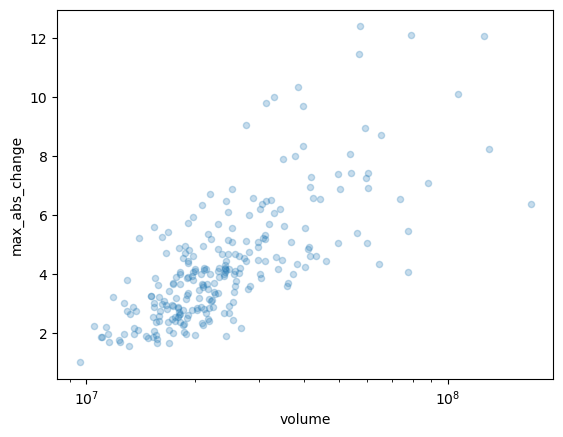

In [24]:
# Using alpha argument to control the transparency of the points
fb.assign(max_abs_change = fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', logx=True, alpha=0.25)

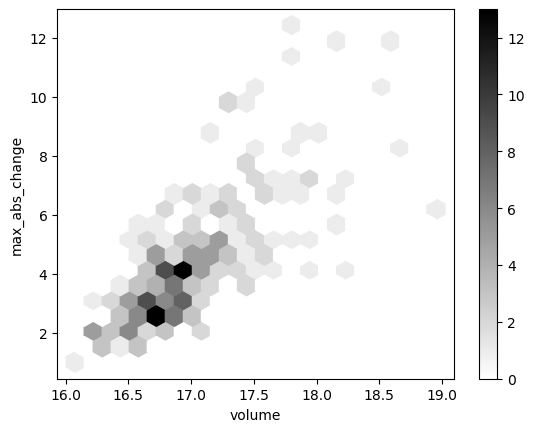

In [25]:
# Hexbin forms a 2D histogram by dividing the plot up into a grid of hexagons and shading them based on the concentration of points in each bin 
fb.assign(volume=np.log(fb.volume), max_abs_change=fb.high -fb.low)\
  .plot(kind='hexbin', x='volume', y='max_abs_change', colormap='gray_r', gridsize=20, sharex=False)

<ipython-input-26-04d23326cb96>:9: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  fig.colorbar(im).set_clim(-1, 1)


[Text(0, 0, ''),
 Text(0, 0, 'open'),
 Text(0, 0, 'high'),
 Text(0, 0, 'low'),
 Text(0, 0, 'close'),
 Text(0, 0, 'volume'),
 Text(0, 0, 'log_volume'),
 Text(0, 0, 'max_abs_change')]

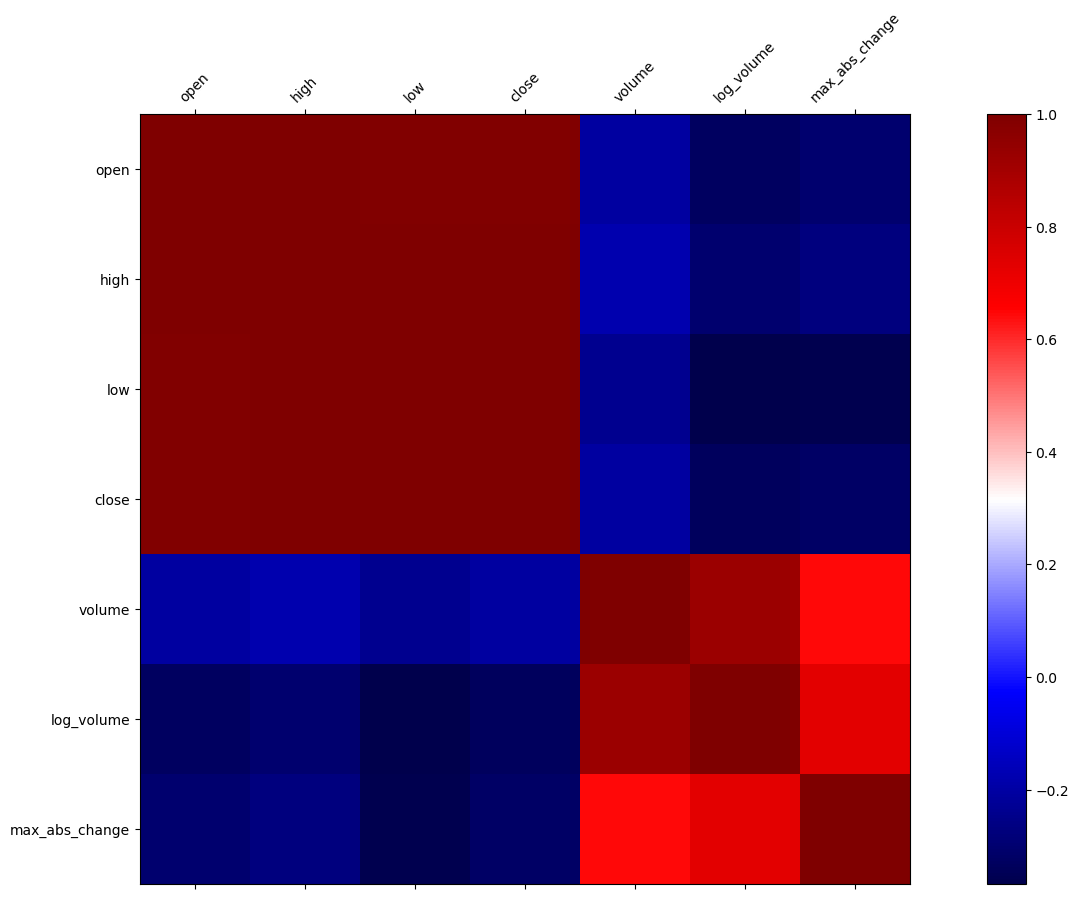

In [26]:
# Visualizing the correlation between variables using a correlation matrix.
# It depicts a magnitude and direction of the correlation.

fig, ax = plt.subplots(figsize=(20, 10))
fb_corr = fb.assign(log_volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).corr()

im = ax.matshow(fb_corr, cmap='seismic')

fig.colorbar(im).set_clim(-1, 1)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

### Distributions

Text(0.5, 0, 'Volume traded')

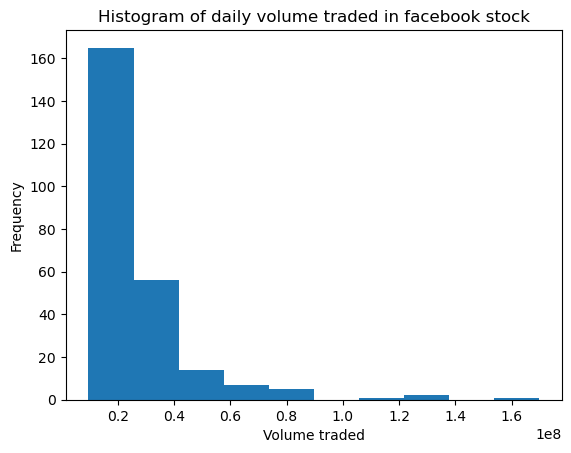

In [27]:
# Take a look at the histogram of daily volume traded in Facebook stock
fb.volume.plot(kind='hist', title='Histogram of daily volume traded in facebook stock')
plt.xlabel('Volume traded')

Text(0.5, 0, 'magnitude')

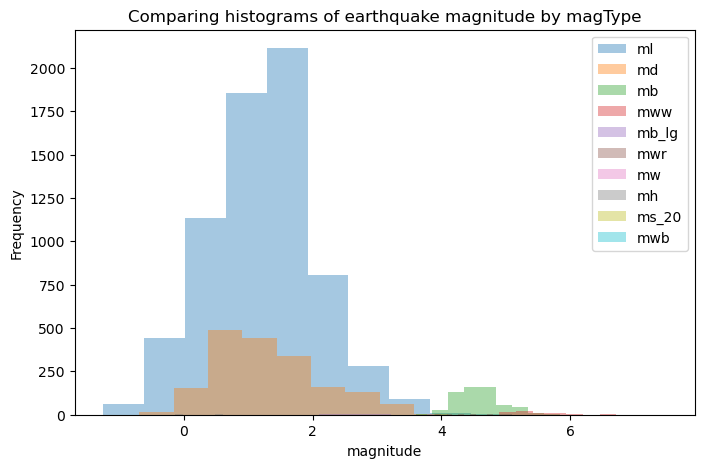

In [28]:
# Creating multiple histograms on the same plot in order to compare distributions by using the ax parameter to specify the same Axes object for each plot

fig, axes = plt.subplots(figsize=(8, 5))
for magtype in earthquakes.magType.unique():
  data = earthquakes.query(f'magType == "{magtype}"').mag
  if not data.empty:
    data.plot(kind='hist', ax=axes, alpha=0.4, label=magtype, legend=True, title='Comparing histograms of earthquake magnitude by magType')

plt.xlabel('magnitude')

# ml is the most common magType followd by md and they yield similar ranges of magnitudes.
# however mb, the third most common, yields higher magnitudes

Text(0.5, 0, 'Price ($)')

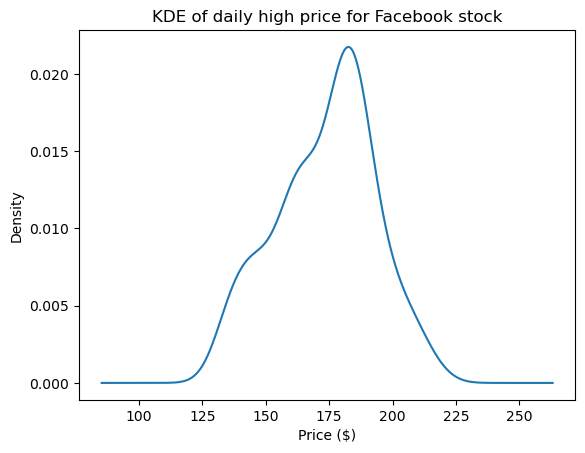

In [29]:
# When working with continuous data (such as stock prices), we can use kernel density estimates (KDE)
fb.high.plot(kind='kde', title='KDE of daily high price for Facebook stock')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

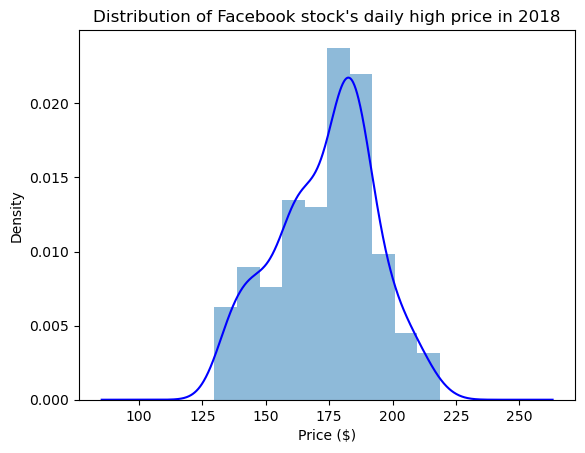

In [30]:
# Visualizing KDE superimposed on top of the histogram
ax = fb.high.plot(kind='hist', density=True, alpha=0.5) # passing density=True to make sure y-axis is on the same scale for both graphs
fb.high.plot(ax=ax, kind='kde', color='blue', title='Distribution of Facebook stock\'s daily high price in 2018')
plt.xlabel('Price ($)')

# KDE shows an estimated probability density function (PDF) which tells how probability is distributed over the values of the data

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

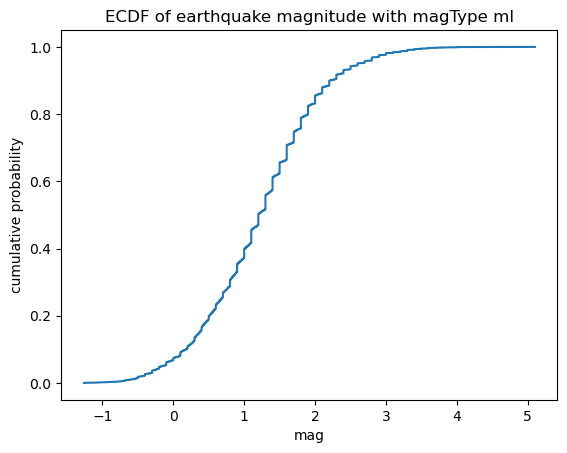

In [31]:
# Probability of getting less than or equal to some value can be seen with the cumulative distribution function (CDF).

# Using statsmodel we can estimate the CDF giving us the empirical cumulative distribution function (EDCF)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(earthquakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

plt.xlabel('mag')
plt.ylabel('cumulative probability')

plt.title('ECDF of earthquake magnitude with magType ml')

# The probability of the 'ml' magnitude of the earthquake being less than or equal to 3, is 98% for earthquakes measured with that magType

Text(0, 0.5, 'price ($)')

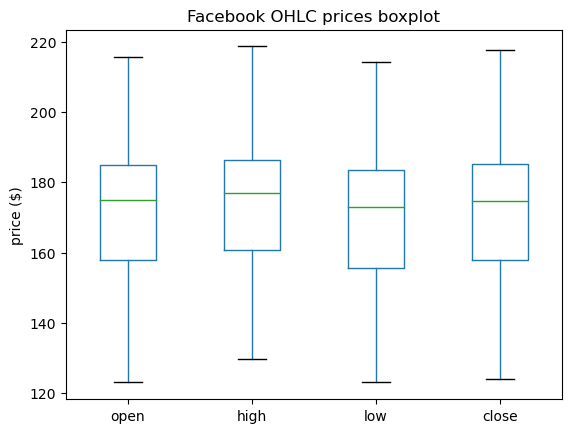

In [32]:
# Visualizing potential outliers and the distribution with quartiles using box plot
fb.iloc[:, :4].plot(kind='box', title='Facebook OHLC prices boxplot')
plt.ylabel('price ($)')

Text(0.5, 1.1, 'Fcebook OHLC boxplots by volume traded')

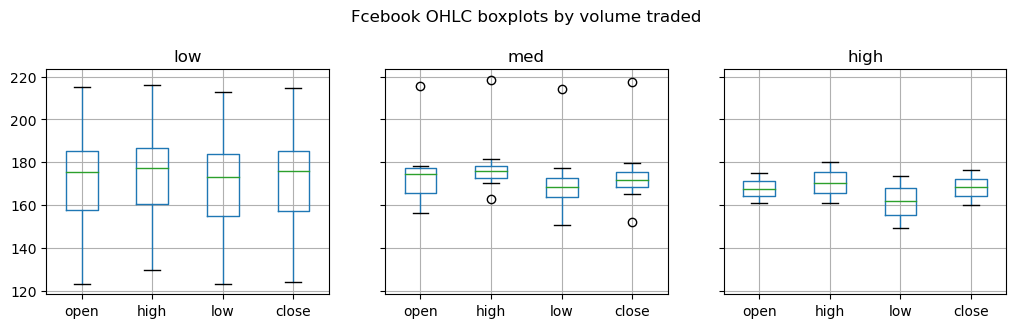

In [33]:
# We can also call boxplot() method after calling groupby() on the dataframe
fb.assign(volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high']))\
  .groupby('volume_bin').boxplot(column=['open', 'high', 'low', 'close'], layout=(1, 3), figsize=(12, 3))

plt.suptitle('Fcebook OHLC boxplots by volume traded', y=1.1)

Text(0, 0.5, 'magnitude')

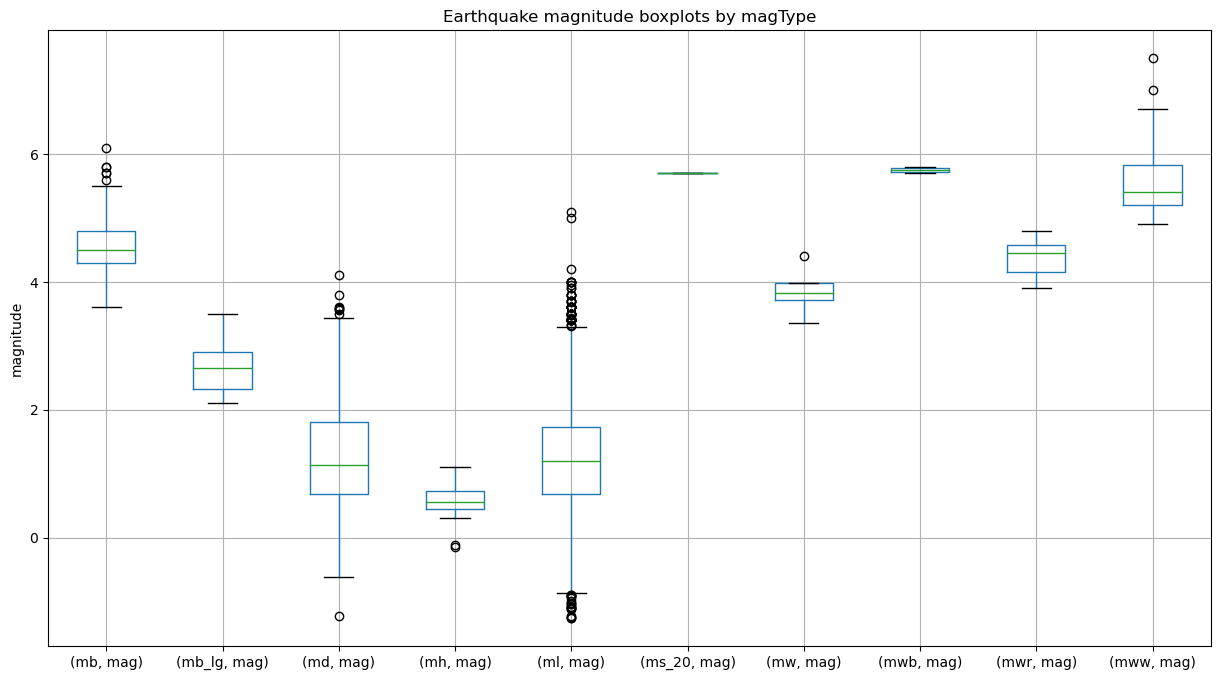

In [34]:
# Using this technique to see the distribution of earthquake magnitudes based on which magType was used and compare it to the expected ranges on the USGS website

earthquakes[['mag', 'magType']].groupby('magType').boxplot(figsize=(15,8), subplots=False)

plt.title('Earthquake magnitude boxplots by magType')
plt.ylabel('magnitude')

### Counts and frequencies

Text(0, 0.5, 'volume')

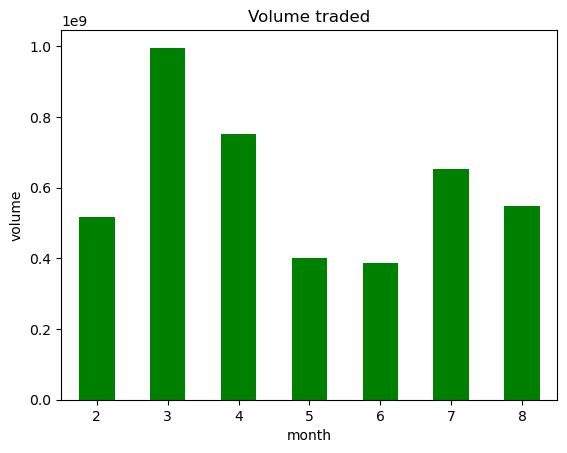

In [35]:
# Plot the total volume trade of Facebook stock per month from Feb 2018 to Aug 2018 by appending a call to the specific plot type
fb['2018-02':'2018-08'].assign(month=lambda x: x.index.month).groupby('month').sum().volume.plot.bar(color='green', rot=0, title='Volume traded')
plt.ylabel('volume')

Text(0.5, 0, 'earthquakes')

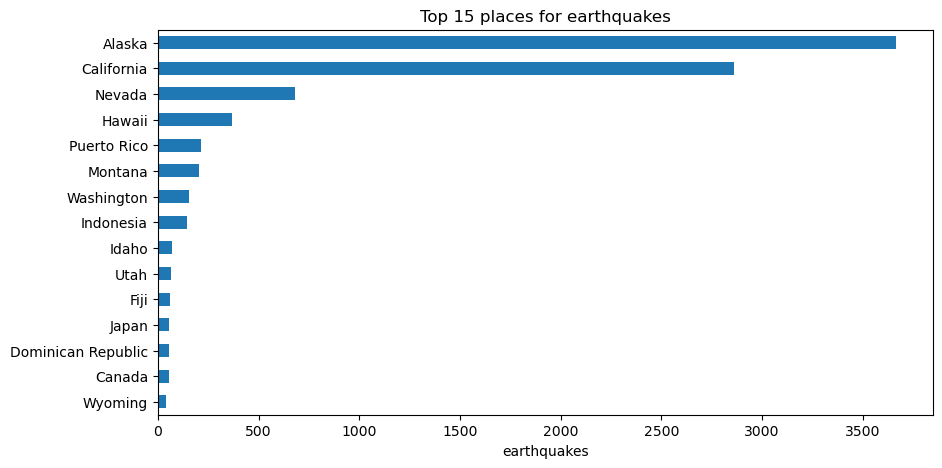

In [36]:
# Take the top 15 places for earthquakes and use value_counts() method on the parsed_place series.
earthquakes = pd.read_csv('earthquakes_parsed_place.csv')
earthquakes.parsed_place.value_counts().iloc[14::-1,].plot(kind='barh', figsize=(10, 5), title='Top 15 places for earthquakes')
plt.xlabel('earthquakes')

Text(0.5, 0, 'tsunamis')

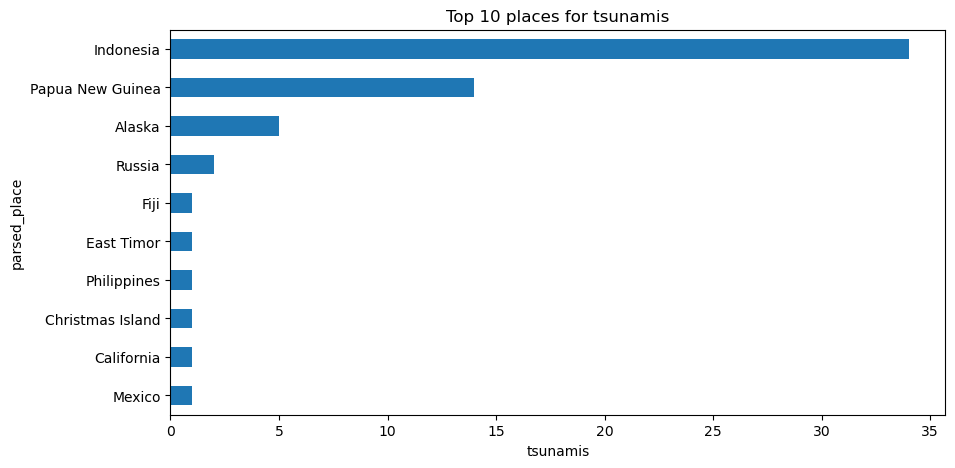

In [37]:
# Top 10 places with tsunamis during the same time period
earthquakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(kind='barh', figsize=(10, 5), title='Top 10 places for tsunamis')
plt.xlabel('tsunamis')

Text(0, 0.5, 'count')

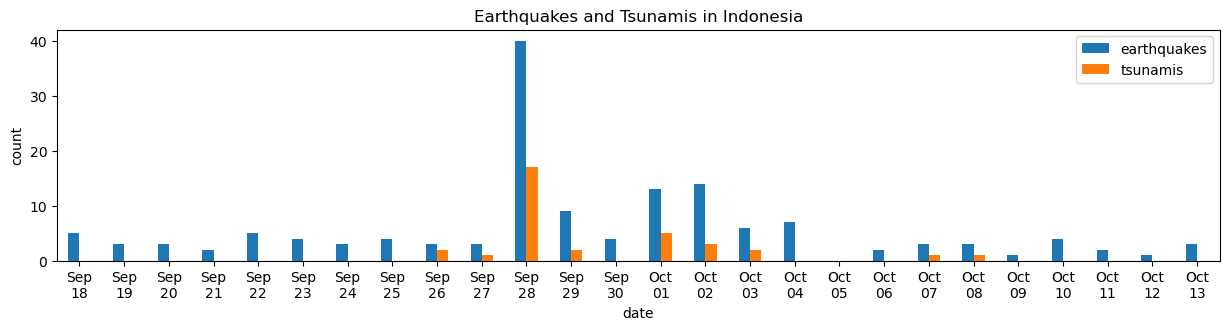

In [38]:
# Closer look at number of tsunamis in Indonesia each day
indonesia_quakes = earthquakes.query('parsed_place == "Indonesia"').assign(time=lambda x: pd.to_datetime(x.time, unit='ms'), earthquake=1).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes.plot(y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0, label=['earthquakes', 'tsunamis'], title='Earthquakes and Tsunamis in Indonesia')
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'earthquakes')

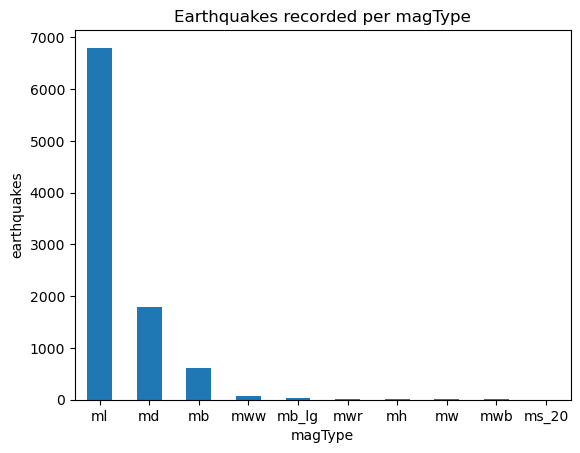

In [39]:
# Using vertical bars to see which methods of measuring earthquake magnitude are most prevalent
earthquakes.magType.value_counts().plot(kind='bar', title='Earthquakes recorded per magType', rot=0)
plt.xlabel('magType')
plt.ylabel('earthquakes')

Text(0, 0.5, 'earthquakes')

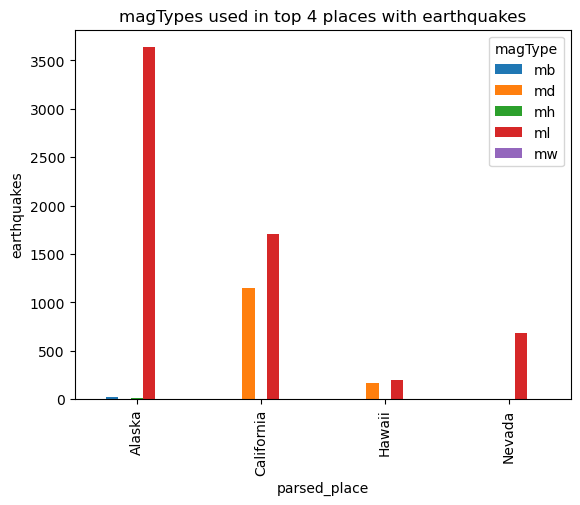

In [40]:
# Grouping top four places with earthquakes using groupby() 
earthquakes[earthquakes.parsed_place.isin([
  'California', 'Alaska', 'Nevada', 'Hawaii'
])]\
.groupby(['parsed_place', 'magType'])\
.mag.count().unstack().plot.bar(title='magTypes used in top 4 places with earthquakes')
plt.ylabel('earthquakes')

Text(0, 0.5, 'earthquakes')

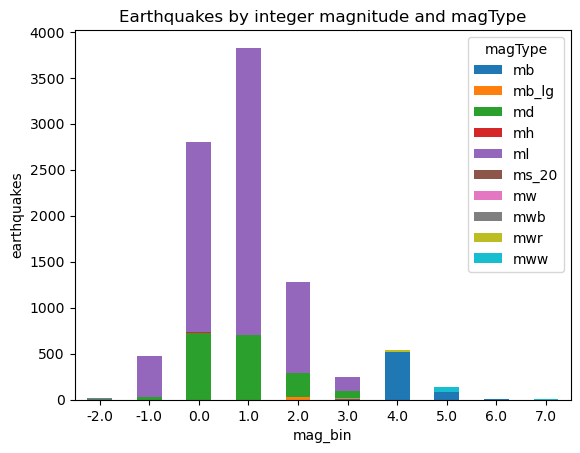

In [41]:
# How many earthquakes of a given maginuted there were, and distinguish them by magType by making a stacked bar plot
# First, round all magnitudes down to the nearest integer.
# Then, create a pivot table with the magnitude in the index and the magType along the columns, counting up the number of earthquakes for the values

pivot = earthquakes.assign(mag_bin=lambda x: np.floor(x.mag)).pivot_table(index='mag_bin', columns='magType', values='mag', aggfunc='count')

pivot.plot.bar(stacked=True, rot=0, title='Earthquakes by integer magnitude and magType')
plt.ylabel('earthquakes')

Text(0, 0.5, 'percentage')

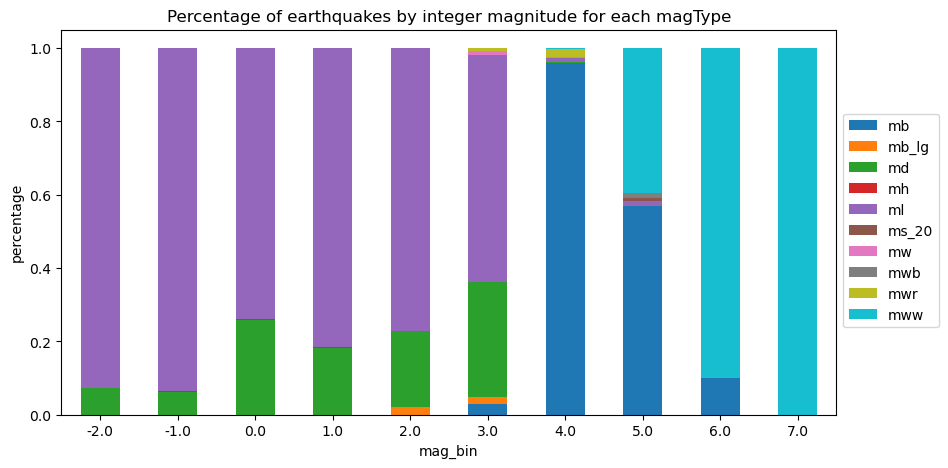

In [42]:
# Making a normalized stacked bar plot as a percentage of earthquakes of a given magnitude using each magType
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(stacked=True, rot=0, figsize=(10, 5), title='Percentage of earthquakes by integer magnitude for each magType')
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of plot
plt.ylabel('percentage')

### pandas.plotting subpackage

#### Scatter matrices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026074B1F6D0>,
      dtype=object)

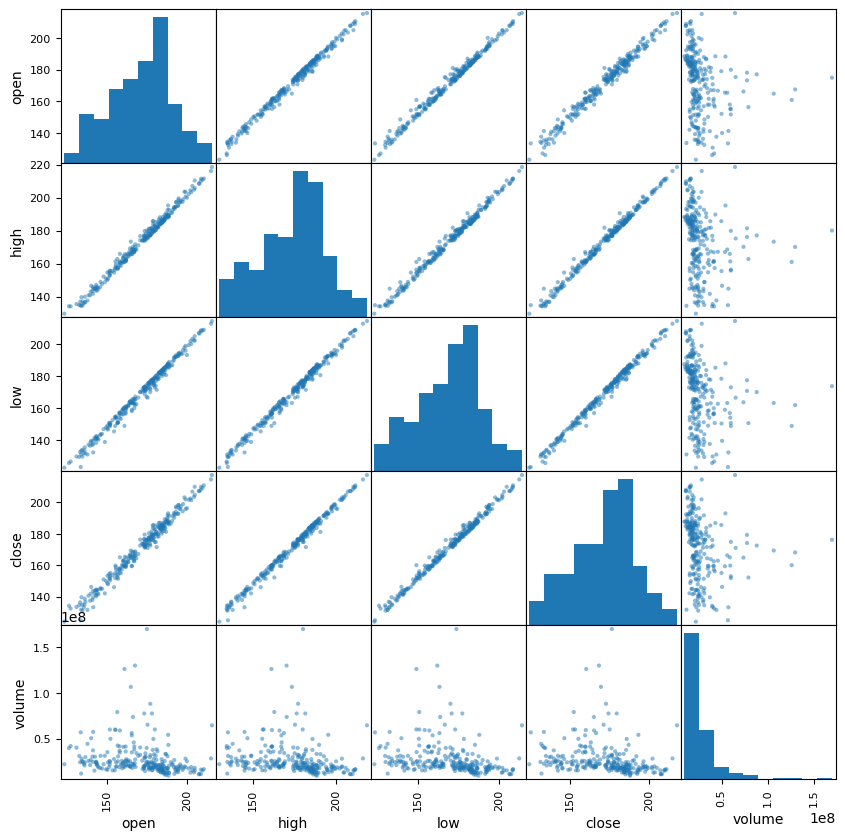

In [44]:
# Using scatter_matrix() to view the scatter plots for each combination of columns in Facebook stock prices data
from pandas.plotting import scatter_matrix

scatter_matrix(fb, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002607C1EC8E0>,
      dtype=object)

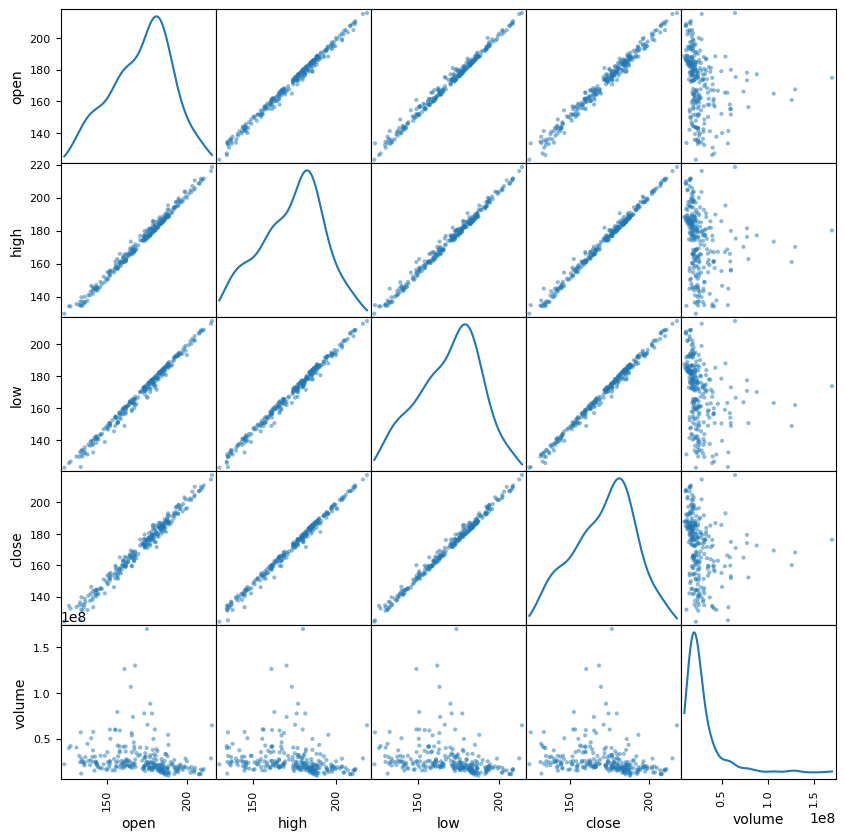

In [45]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

#### Lag plots

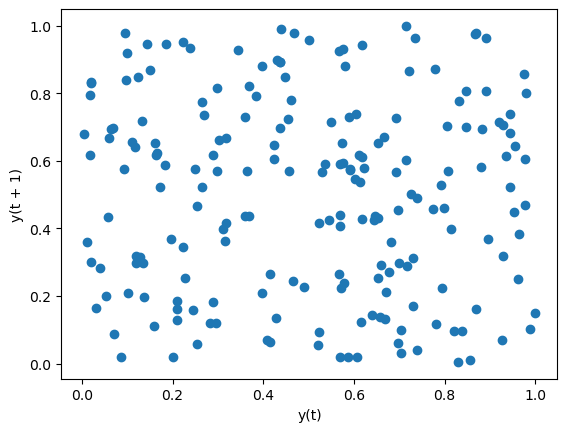

In [47]:
# Using lag plots to check for relationships among values at a given time to those a certaing number of periods before that time
# Creating a scatter plot of data[:-1] (all but last entry) and data[1:] (from second entry to the last one)

# If the data is random, this plot will have no pattern
from pandas.plotting import lag_plot
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)))

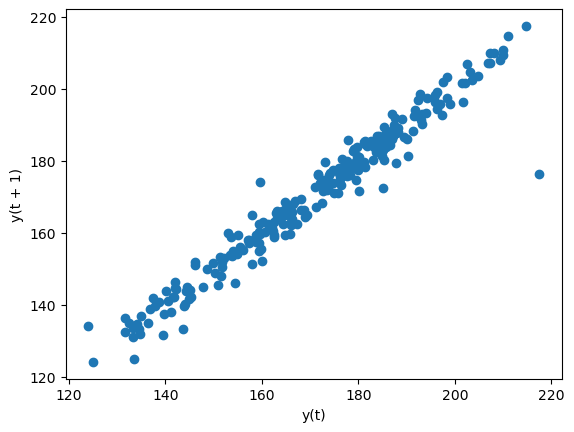

In [48]:
# With stock data, prices on a given day are determined by what happened the day before
lag_plot(fb.close)

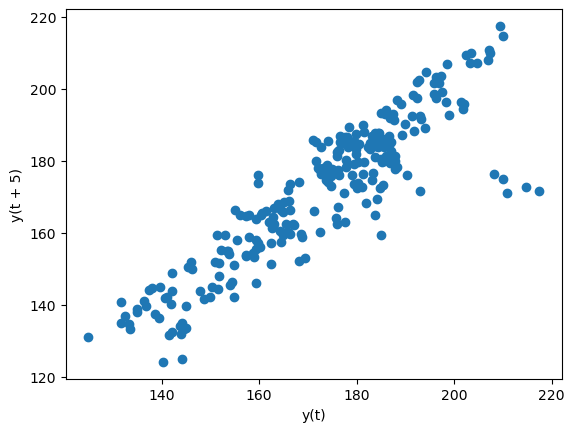

In [49]:
# Specifying the number of periods to use for this lag
lag_plot(fb.close, lag=5)

#### Autocorrelation plots

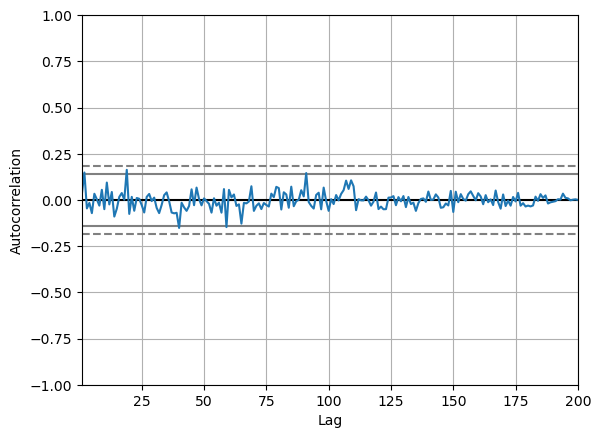

In [50]:
# Autocorrelation means that the time series is correlated with a lagged version of itself

# Random data will be near an autocorrelation 0 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pd.Series(np.random.random(size=200)))

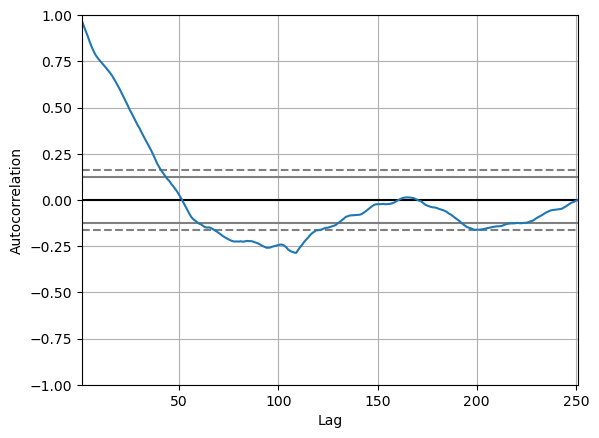

In [51]:
# Checking autocorrelation for Facebook stock's closing price
autocorrelation_plot(fb.close)

# There is autocorrelation for many lag periods before it becomes noise

#### Bootstrap plots

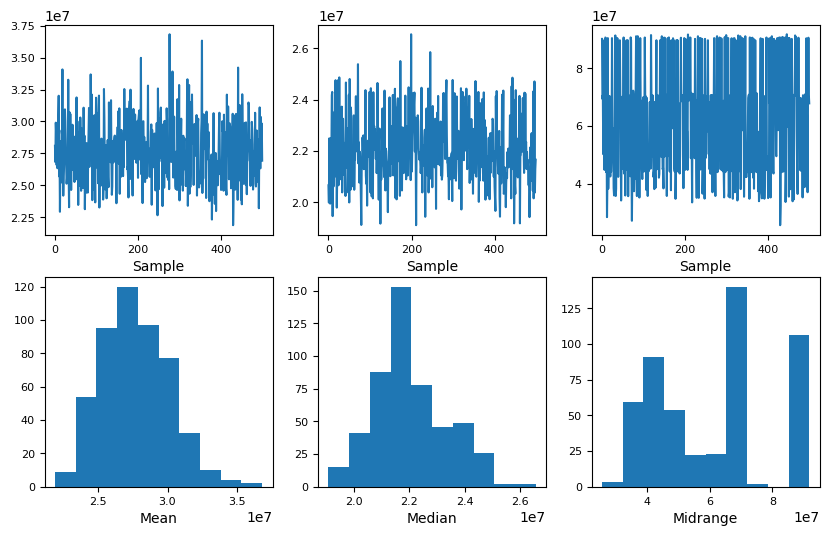

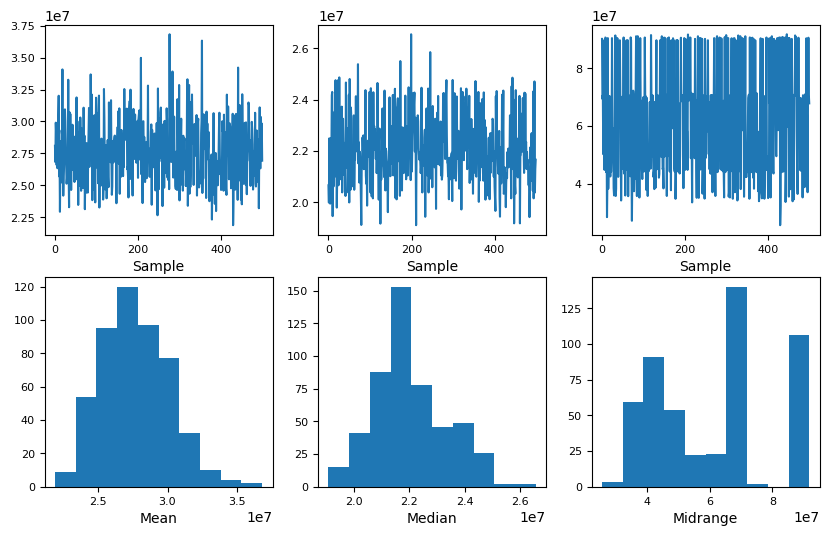

In [53]:
# Assessing the uncertainty of common summary statistics using bootstrapping
# The function will take the specifies number of random samples of a given size from the variable in question and calculate the summary statistics

from pandas.plotting import bootstrap_plot

bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

Further reading

Take a look at the following resources for additional information on the concepts
covered in this chapter:
- Bootstrapping (statistics): https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%2
- Data Visualization—Best Practices and Foundations: https://www.toptal.com/designers/data-visualization/data-visualization-best-practices
- How to Create Animated Graphs in Python (with matplotlib): https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1
- Interactive plots with JavaScript (D3.js): https://d3js.org/
- Intro to Animations in Python (with plotly): https://plot.ly/python/
animations/
- IPython: Built-in magic commands: https://ipython.readthedocs.io/en/
stable/interactive/magics.html
- The Importance of Integrity: How Plot Parameters Influence Interpretation: https://www.t4g.com/insights/plot-parameters-
influence-interpretation/
- 5 Python Libraries for Creating Interactive Plots: https://blog.modeanalytics.com/python-interactive-plot-libraries/